In [4]:
import numpy as np
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

from exputils import *

# Load Data

In [3]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

# Support

In [2]:
def supres(ltp, n):
    """
    This function takes a numpy array of last traded price
    and returns a list of support and resistance levels
    respectively. n is the number of entries to be scanned.
    """
    from scipy.signal import savgol_filter as smooth

    # converting n to a nearest even number
    if n % 2 != 0:
        n += 1
    n_half = int(n / 2)

    n_ltp = ltp.shape[0]

    # smoothening the curve
    ltp_s = smooth(ltp, n + 1, 3)
    ltp_s = np.insert(ltp_s[n + 1:], 0, [0] * (n + 1))

    # taking a simple derivative
    ltp_d = np.zeros(n_ltp)
    ltp_d[1:] = np.subtract(ltp_s[1:], ltp_s[:-1])

    resistance = []
    support = []

    for i in range(n_ltp - n):
        arr_sl = ltp_d[i:(i + n)]
        first = arr_sl[:n_half]  # first half
        last = arr_sl[n_half:]  # second half

        r_1 = np.sum(first > 0)
        r_2 = np.sum(last < 0)

        s_1 = np.sum(first < 0)
        s_2 = np.sum(last > 0)

        # local maxima detection
        if (r_1 == n_half) and (r_2 == n_half):
            k = i + (n_half - 1)
            resistance.append([k, ltp[k]])

        # local minima detection
        if (s_1 == n_half) and (s_2 == n_half):
            k = i + (n_half - 1)
            support.append([k, ltp[k]])

    return np.array(support), np.array(resistance)

In [8]:
def find_support(i, supports):
    selected = supports[supports['index'] <= i]['support']
    return None if len(selected) == 0 else selected.iloc[-1]


def ohlc_supports(data, supports):
    data = data_dict[pair]
    s = [find_support(i, supports) for i in range(len(data))]
    return s

In [26]:
def get_supports(data, window_size):
    supports, _ = supres(data['ohlc4'].values, window_size)
    supports = pd.DataFrame(supports, columns=['index', 'support'])
    support_vals = supports['support'].values
    size = support_vals.shape[0]
    _return = (support_vals[1:] / support_vals[:size-1]) - 1
    _return = np.insert(_return, 0, 0)
    supports['return1'] = _return
    return supports

In [116]:
def plot_ohlc_with_points(ohlc, supports):
    def plot_points(points, c):
        points_s = points[(points[:, 0] >= min_i) & (points[:, 0] <= max_i)]
        plt.scatter(points_s[:, 0] - min_i, points_s[:, 1], s=150, c=c);
        
    
    min_i, max_i = ohlc['index'].min(), ohlc['index'].max()
    
    return1 = -0.01
    no_interesting = supports.query(f'return1 > {return1}')[['index', 'support']].values
    interesting = supports.query(f'return1 <= {return1}')[['index', 'support']].values
    
    print(f'interesting = {interesting.shape[0]} ({interesting.shape[0] / supports.shape[0]} %)')
    
    plot_candles(ohlc);
    plot_points(no_interesting, 'b')
    plot_points(interesting, 'g')
    
    
def plot_selected(selected_data, supports):
    step = 150
    for i in range(0, len(selected_data), step):
        to_plot = selected_data.iloc[i:i+step].reset_index()
        plot_ohlc_with_points(to_plot, supports)
        
        
def plot_normalized(selected_data, supports):
    tmp = selected_data.copy().reset_index()
    l = tmp['close'].iloc[0]
    tmp['close'] = (tmp['close'] / l) - 1
    tmp['open'] = (tmp['open'] / l) - 1
    tmp['low'] = (tmp['low'] / l) - 1
    tmp['high'] = (tmp['high'] / l) - 1
    tmp_supports = supports.copy()
    tmp_supports['support'] = (tmp_supports['support'] / l) -1
    plot_candles(tmp)
    plot_selected(tmp, tmp_supports)

# VTC

In [71]:
eth['ohlc4']

0.028394107588857

In [70]:
vtc['ohlc4']

0.0001441323396910956

In [28]:
vtc = read_all('BTC_VTC', dropbox_dir)
supports_vtc = get_supports(vtc, 4)

In [29]:
supports_vtc.shape

(5600, 3)

In [ ]:
selected_data = vtc.query('date > "2019"')
plot_selected(selected_data, supports_vtc)

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c284d9198>)

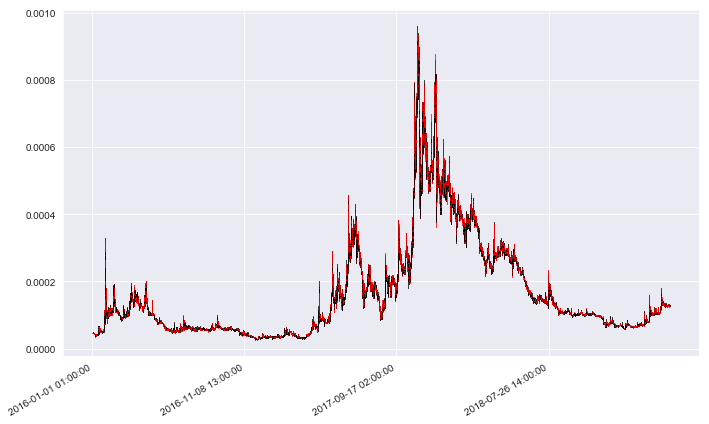

In [117]:
plot_candles(vtc)

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c31109550>)

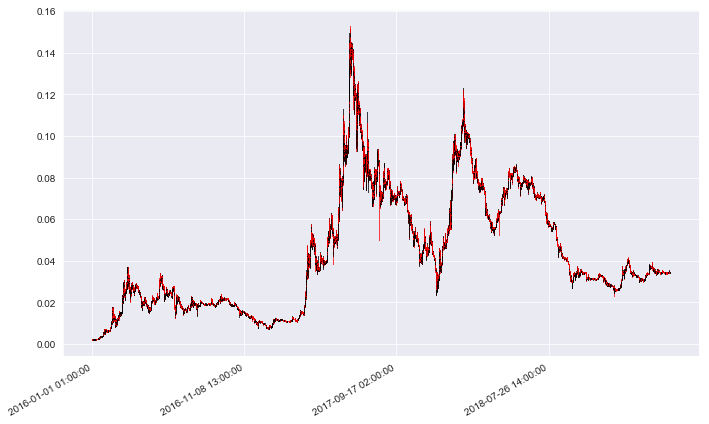

In [120]:
plot_candles(eth)

# ETH

In [6]:
eth = read_all('BTC_ETH', dropbox_dir)
supports_eth = get_supports(eth, 4)

In [40]:
supports_eth.shape

(5643, 3)

In [ ]:
selected_data = eth.query('date > "2019"')
plot_selected(selected_data, supports_eth)

# SYS

In [88]:
sys = read_all('BTC_SYS', dropbox_dir)
supports_sys = get_supports(sys, 4)

In [ ]:
selected_data = sys.query('date > "2019"')
plot_selected(selected_data, supports_sys)

In [103]:
sys.query('date > "2019"')

1.057e-05

interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)
interesting = 1487 (0.2722445990479678 %)


/anaconda3/envs/crypto36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


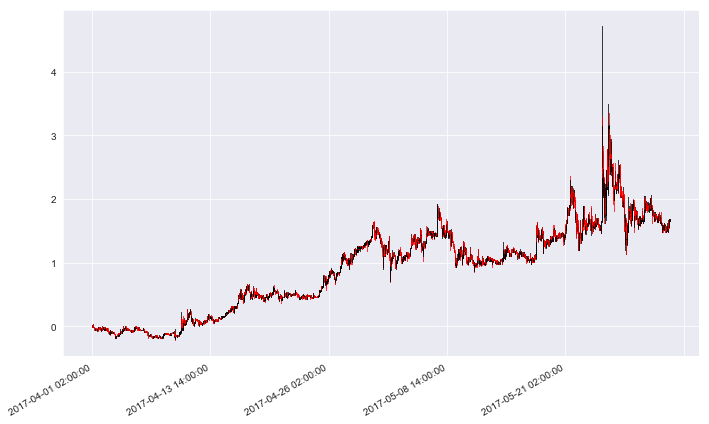

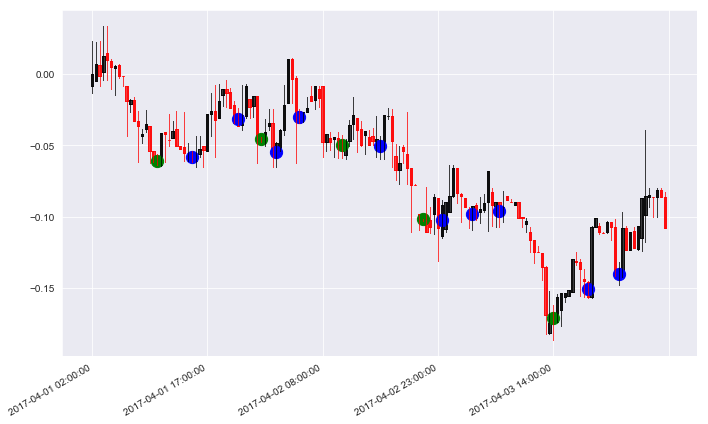

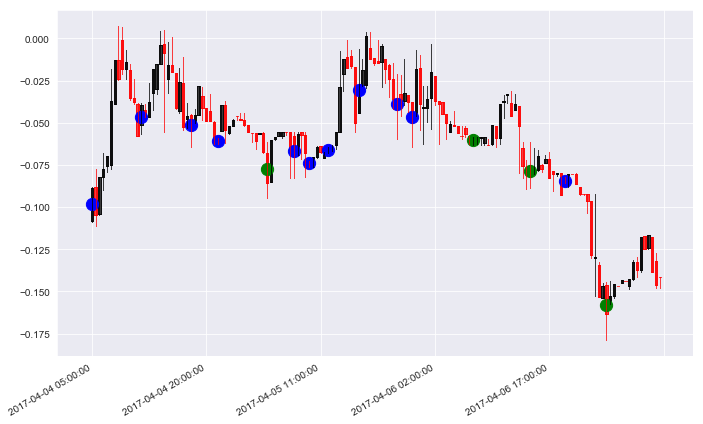

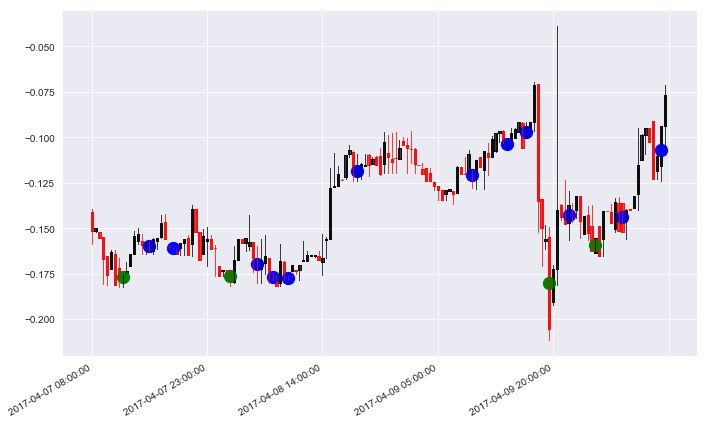

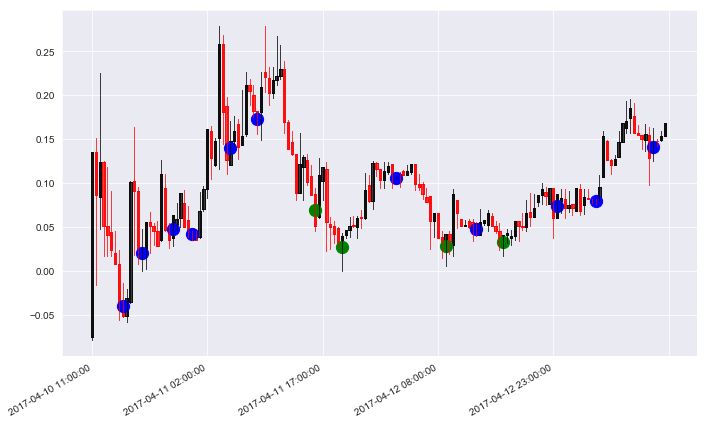

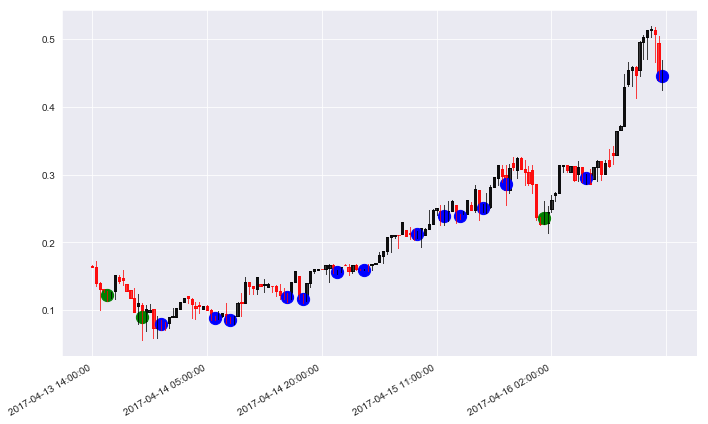

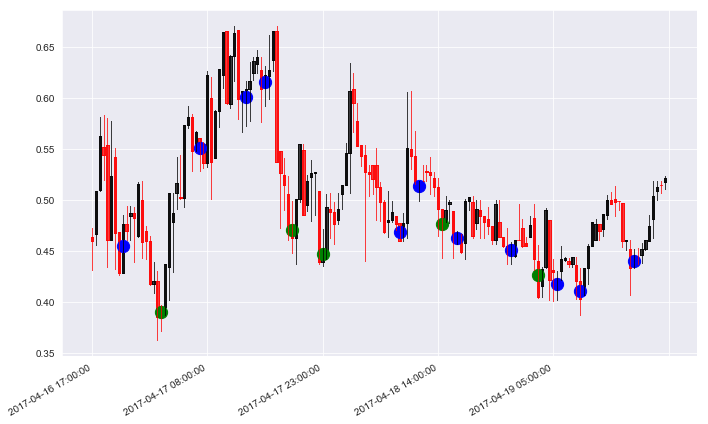

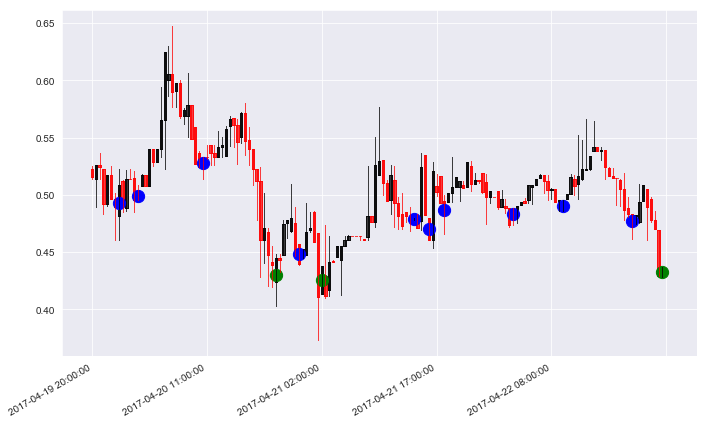

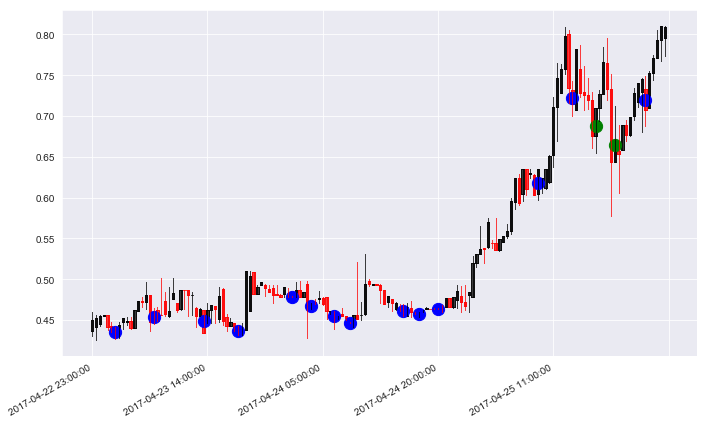

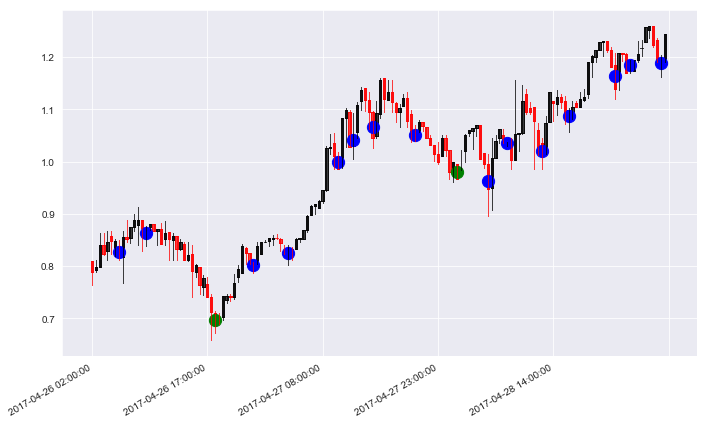

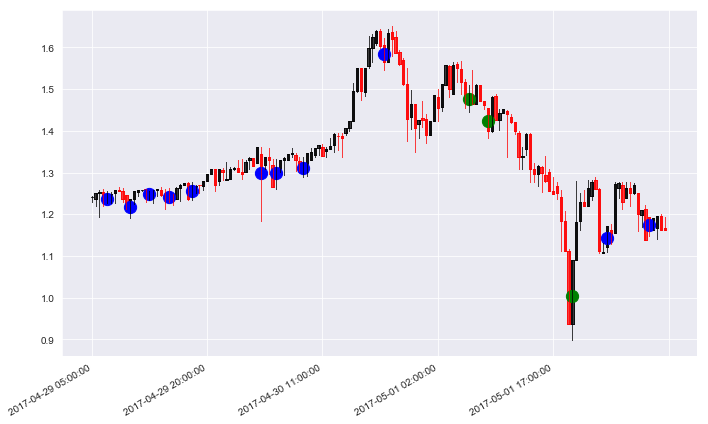

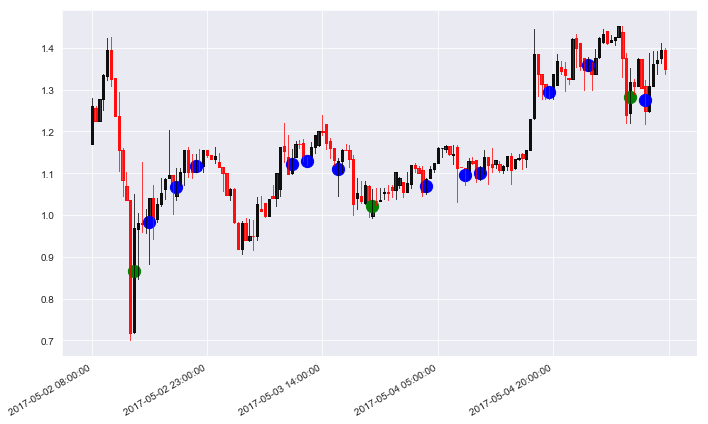

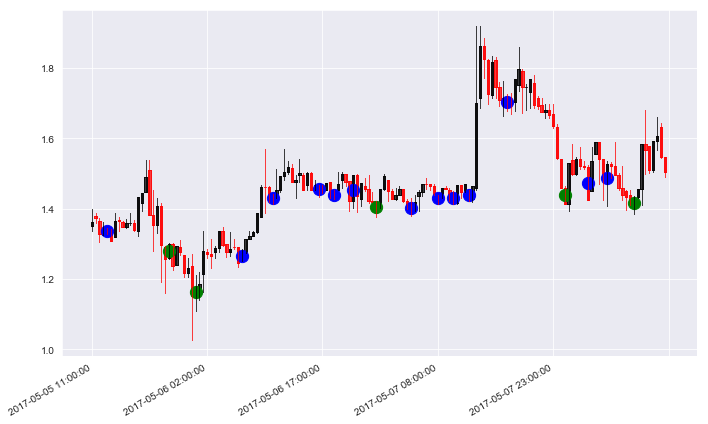

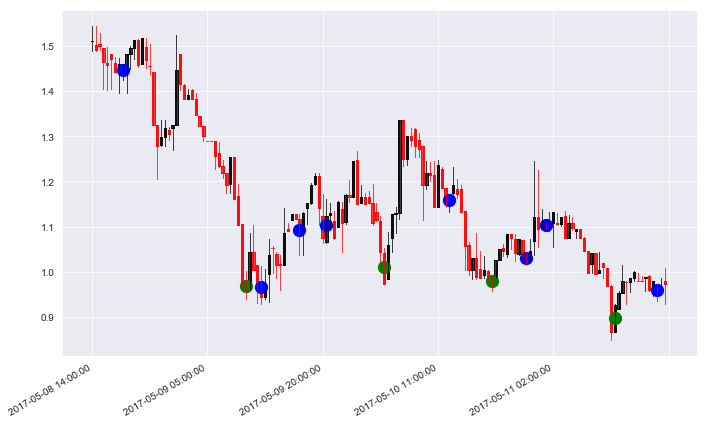

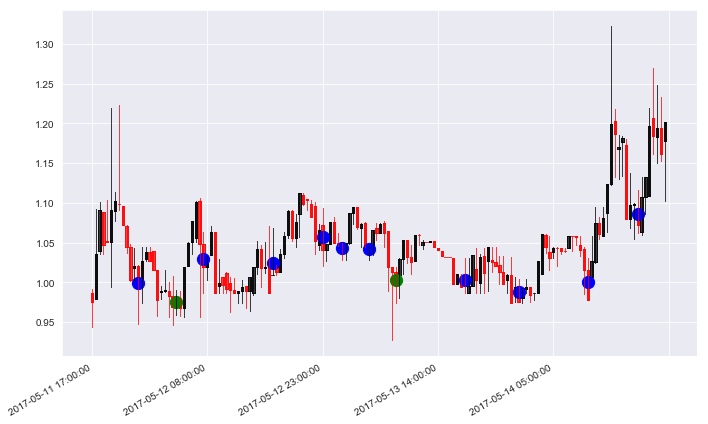

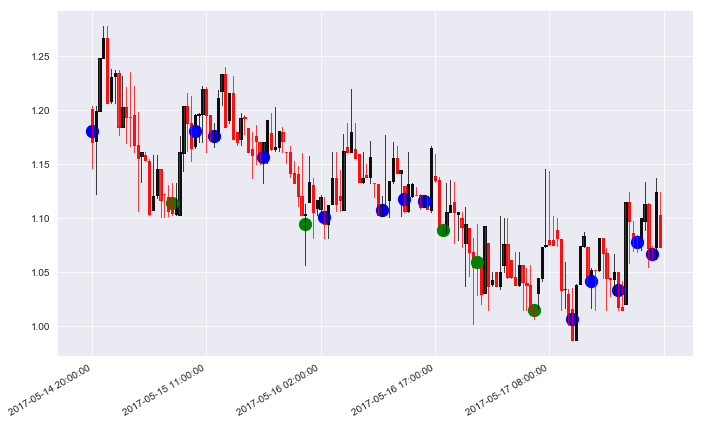

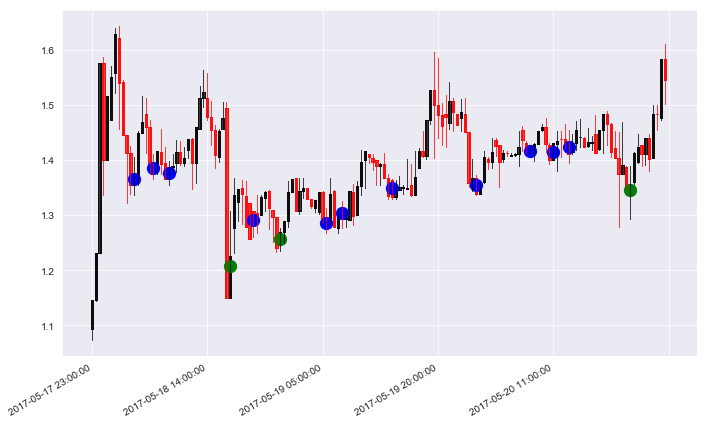

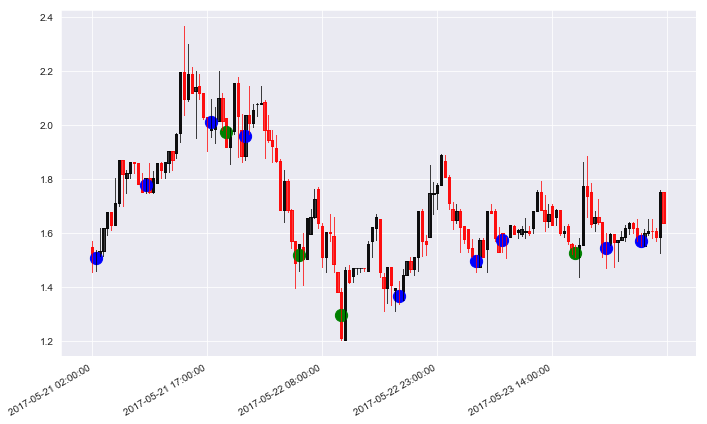

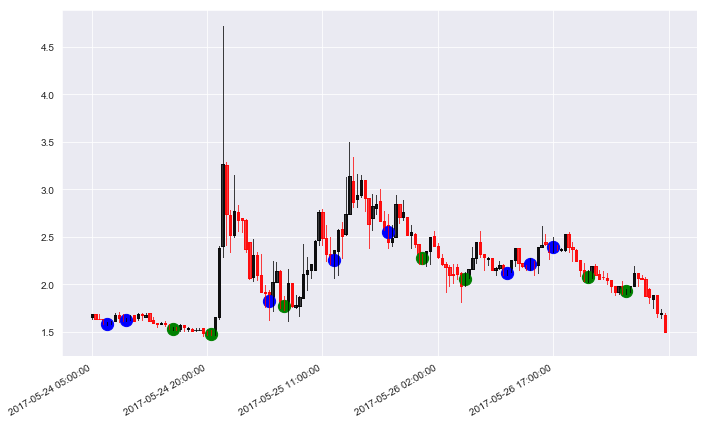

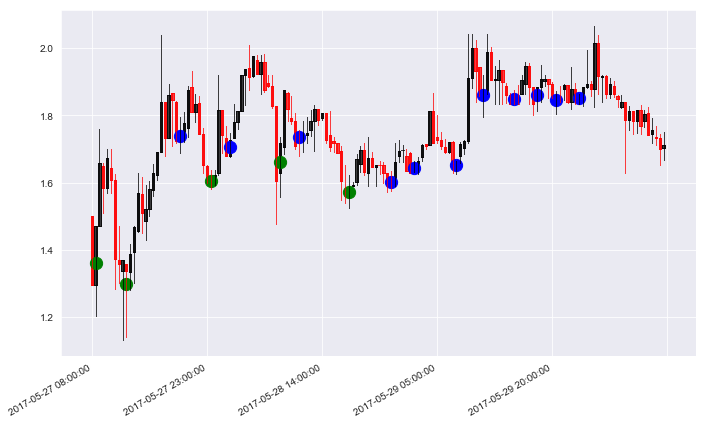

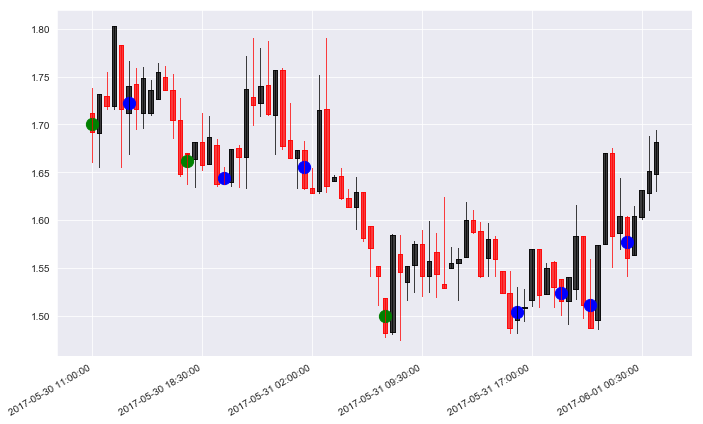

# Variance comparison

In [89]:
def mean_of_std(_ohlc):
    ohlc = _ohlc.copy()
    ohlc['day'] = ohlc['date'].apply(lambda x: x[:10])
    mean_of_s = ohlc[['day', 'ohlc4']].groupby('day').std().mean()
    return mean_of_s.iloc[0]

In [86]:
mean_of_std(vtc)

5.02217626371573e-06

In [87]:
mean_of_std(eth)

0.0006764958771994614

In [92]:
mean_of_std(sys)

7.044461134049521e-07

# Mean candle size

In [94]:
def mean_candle_size(ohlc): 
    return ((ohlc['high'] / ohlc['low']) - 1).mean()

In [95]:
mean_candle_size(vtc)

0.01762394033042032

In [96]:
mean_candle_size(eth)

0.011011766210462284

In [97]:
mean_candle_size(sys)

0.016449800181031166